In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import helper

plt.rcParams["text.usetex"] = True
plt.rc("text.latex", preamble=r"\usepackage{fourier}")
plt.rcParams.update({"font.size": 26})

In [2]:
path = Path("../../../../../../../thesis_code/data/spin-2")
filename = "49f_UN-BN_VF-SQV.hdf5"

# Load data
data = h5py.File(path / filename, "r")
x, y, z = data["grid/x"], data["grid/y"], data["grid/z"]
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
dx, dy, dz = x[1] - x[0], y[1] - y[0], z[1] - z[0]

frame = -1
psip2 = data["wavefunction/psiP2"][:, :, :, frame]
psip1 = data["wavefunction/psiP1"][:, :, :, frame]
psi0 = data["wavefunction/psi0"][:, :, :, frame]
psim1 = data["wavefunction/psiM1"][:, :, :, frame]
psim2 = data["wavefunction/psiM2"][:, :, :, frame]

zetap2, zetap1, zeta0, zetam1, zetam2 = helper.normalise_wfn(psip2, psip1, psi0,
                                                             psim1, psim2)

In [3]:
# Tophat for smoothing plots
sigma = 0.5
c0 = 1.32e4
c2 = 146
g = c0 + 4 * c2
rtf = (15 * g / (4 * np.pi)) ** 0.2
tophat = 0.5 * (1 - np.tanh(sigma * (X ** 2 + Y ** 2 + Z ** 2 - rtf ** 2)))

In [4]:
a30 = tophat * abs(helper.calc_spin_singlet_trio(zetap2, zetap1, zeta0, zetam1,
                                                 zetam2)) ** 2

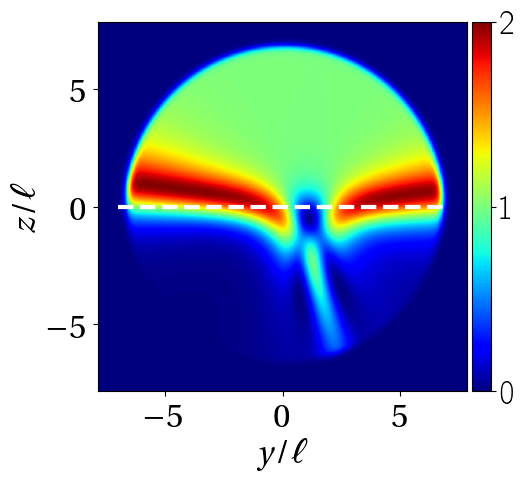

In [5]:
fig, ax = plt.subplots(1, )
ax.set_xlim(-X.max() + 2, X.max() - 2)
ax.set_ylim(-Y.max() + 2, Y.max() - 2)
ax.set_xlabel(r'$y/\ell$')
ax.set_ylabel(r'$z/\ell$')
extent = (-X.max(), X.max(), -Y.max(), Y.max())
plot = ax.imshow(a30[74, :, :].T, extent=extent, origin='lower', vmin=0,
                 vmax=2, interpolation='gaussian', cmap='jet')
ax.plot([-7, 7], [0, 0], 'w--', linewidth=3)
constz_cbar = plt.colorbar(plot, ax=ax, pad=0.01, location='right')
constz_cbar.set_ticks([0, 1, 2])
constz_cbar.set_ticklabels(['0', '1', '2'])
plt.savefig('../../../gfx/ch-spin2/UN-BN_VF-SQV_a30.pdf',
            bbox_inches='tight')